17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.5942 - loss: 0.6479 - val_accuracy: 0.8106 - val_loss: 0.4253
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.8628 - loss: 0.3334 - val_accuracy: 0.8176 - val_loss: 0.4120
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.9262 - loss: 0.1942 - val_accuracy: 0.8083 - val_loss: 0.4788
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9707 - loss: 0.0940 - val_accuracy: 0.7995 - val_loss: 0.5729
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.9876 - loss: 0.0411 - val_accuracy: 0.8051 - val_loss: 0.8129


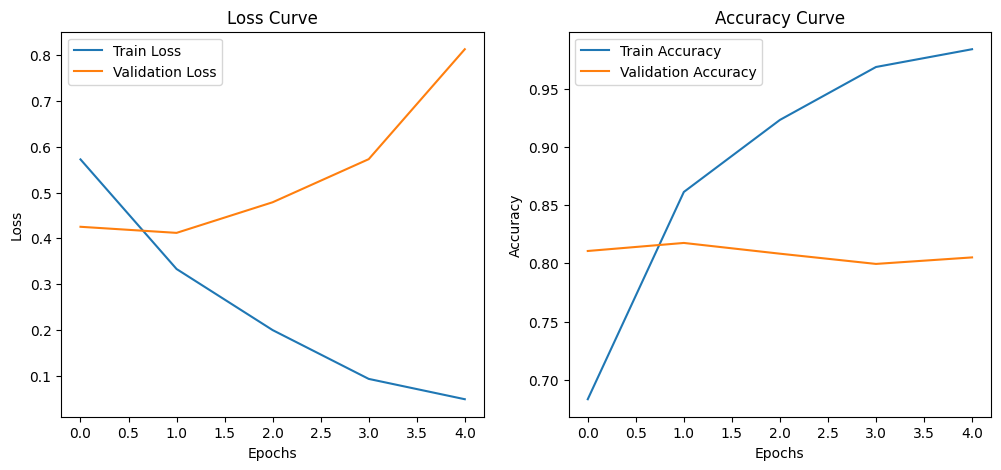

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8040 - loss: 0.8230
Test accuracy: 0.8051199913024902


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=100)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=100)

model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=100),
    keras.layers.SimpleRNN(32),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

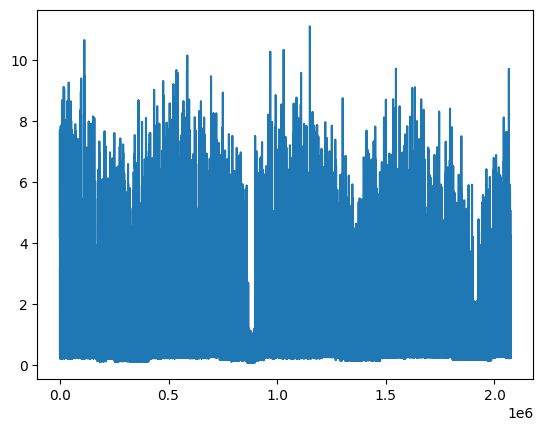

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/household_power_consumption.txt'

df = pd.read_csv(file_path, sep=';', parse_dates={'dt': ['Date', 'Time']},
                 dayfirst=True, low_memory=False, na_values=['nan','?'], index_col='dt')

df.fillna(df.mean(), inplace=True)

data = df['Global_active_power'].values.astype(float)

plt.plot(data)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5
41506/41506 ━━━━━━━━━━━━━━━━━━━━ 160s 4ms/step - loss: 6.8256e-04 - val_loss: 6.1178e-04
Epoch 2/5
41506/41506 ━━━━━━━━━━━━━━━━━━━━ 205s 4ms/step - loss: 5.7429e-04 - val_loss: 5.5593e-04
Epoch 3/5
41506/41506 ━━━━━━━━━━━━━━━━━━━━ 171s 4ms/step - loss: 5.7135e-04 - val_loss: 5.6216e-04
Epoch 4/5
41506/41506 ━━━━━━━━━━━━━━━━━━━━ 158s 4ms/step - loss: 5.7051e-04 - val_loss: 5.6331e-04
Epoch 5/5
41506/41506 ━━━━━━━━━━━━━━━━━━━━ 205s 4ms/step - loss: 5.7211e-04 - val_loss: 5.5623e-04


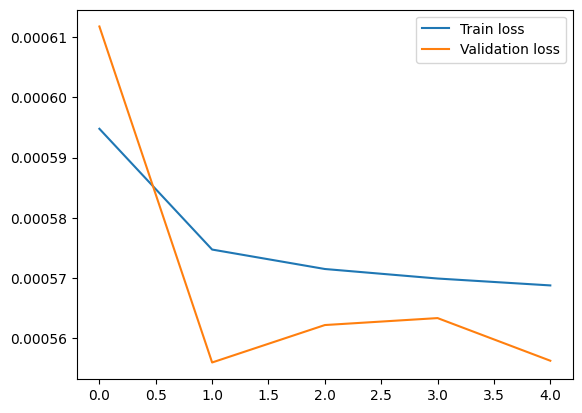

12971/12971 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step


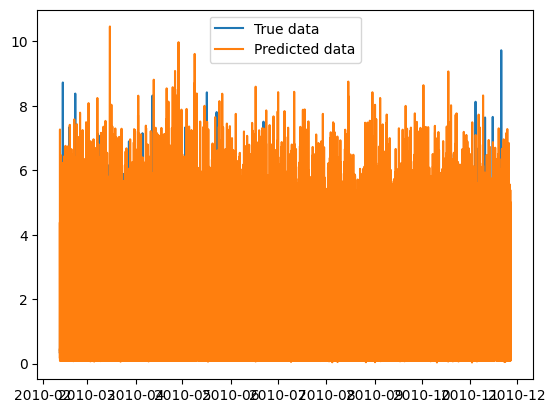

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

file_path = '/content/drive/My Drive/household_power_consumption.txt'
df = pd.read_csv(file_path, sep=';', parse_dates={'dt': ['Date', 'Time']},
                 dayfirst=True, low_memory=False, na_values=['nan', '?'], index_col='dt')

df.fillna(df.mean(), inplace=True)

data = df[['Global_active_power']].copy()
data['lag1'] = data['Global_active_power'].shift(1)
data['lag2'] = data['Global_active_power'].shift(2)
data.dropna(inplace=True)

X = data[['lag1', 'lag2']].values
y = data['Global_active_power'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_val = scaler_y.transform(y_val)
y_test = scaler_y.transform(y_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])
plt.show()

predicted = model.predict(X_test)
predicted = scaler_y.inverse_transform(predicted)

plt.plot(df.index[-len(predicted):], df['Global_active_power'][-len(predicted):], label='True data')
plt.plot(df.index[-len(predicted):], predicted, label='Predicted data')
plt.legend(['True data', 'Predicted data'])
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def generate_data(n_samples=1000, n_features=20):
    X = np.random.rand(n_samples, n_features)
    y = np.random.randint(0, 2, size=(n_samples, 1))
    return X, y

def create_deep_network(activation='sigmoid'):
    model = Sequential()
    model.add(Dense(64, input_dim=20, activation=activation))
    for _ in range(10):
        model.add(Dense(64, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    return model

class GradientMonitorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        grads = []
        for layer in self.model.layers:
            if hasattr(layer, 'kernel'):
                grads.append(tf.reduce_mean(tf.abs(layer.kernel)))
        if grads:
            grad_mean = np.mean([g.numpy() for g in grads])
            print(f"Epoch {epoch+1}: Gradient Mean: {grad_mean:.4f}")

X, y = generate_data()

model = create_deep_network()

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print("Training the model...")
model.fit(X, y, epochs=5, batch_size=32, callbacks=[GradientMonitorCallback()])

loss, accuracy = model.evaluate(X, y)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the model...
Epoch 1/5
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4952 - loss: 0.7496Epoch 1: Gradient Mean: 0.1150
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4956 - loss: 0.7474
Epoch 2/5
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5182 - loss: 0.6931Epoch 2: Gradient Mean: 0.1149
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5150 - loss: 0.6934
Epoch 3/5
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5019 - loss: 0.6934Epoch 3: Gradient Mean: 0.1149
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5029 - loss: 0.6934
Epoch 4/5
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5209 - loss: 0.6926Epoch 4: Gradient Mean: 0.1149
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5170 - loss: 0.6927
Epoch 5/5
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4990 - loss: 0.6933Epoch 5: Gradient Mean: 0.1149
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4959 - loss: 0.6934
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accurac

# New Section